In [1]:
# Import TensorFlow 2.x in compatibility mode
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import pandas as pd

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

## Load and preprocess the dataset

In [4]:
data = pd.read_csv(r'C:\Users\Alon\OneDrive\שולחן העבודה\קורסים\למידה עמוקה\archive\diabetes.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Define features and labels

In [6]:
y = data['Outcome']

In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
X = data.copy().drop(columns='Outcome')

In [9]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## Split the data into train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network Model

## Define the neural network architecture

In [11]:
input_size = X_train.shape[1]
output_size = 1  # Simple classification

In [12]:
# Placeholder for input data
X = tf.placeholder(tf.float32, shape=[None, input_size], name='X')

In [13]:
# Placeholder for labels
y = tf.placeholder(tf.float32, shape=[None, output_size], name='y')

In [15]:
# Define the neural network model
hidden_size = 32

# Define the number of hidden layers (L)
L = 3

# Input layer
hidden_layer = X

# Create L hidden layers
for i in range(L):
    hidden_layer = tf.layers.dense(inputs=hidden_layer, units=hidden_size, activation=tf.nn.relu, name=f'hidden_layer_{i+1}')

# Output layer
output_layer = tf.layers.dense(inputs=hidden_layer, units=output_size, name='output_layer')

C:\Users\Alon\AppData\Local\Temp\ipykernel_6172\719582209.py:12: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden_layer = tf.layers.dense(inputs=hidden_layer, units=hidden_size, activation=tf.nn.relu, name=f'hidden_layer_{i+1}')
C:\Users\Alon\AppData\Local\Temp\ipykernel_6172\719582209.py:15: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  output_layer = tf.layers.dense(inputs=hidden_layer, units=output_size, name='output_layer')


In [16]:
# Define loss function and optimizer
loss = tf.reduce_mean(tf.square(output_layer - y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

In [17]:
# Initialize variables
init = tf.global_variables_initializer()

## Train the model

In [18]:
epochs = 5000
batch_size = 32

# Lists to store training history
training_losses_nn = []

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size].values.reshape(-1, 1)  # Convert to NumPy array and reshape

            sess.run(train_op, feed_dict={X: X_batch, y: y_batch})

        # Print training progress
        if (epoch + 1) % 500 == 0:
            training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train.values.reshape(-1, 1)})
            print(f'Epoch {epoch+1}/{epochs}, Training Loss: {training_loss}')
            
            # Save training loss for plotting
            training_losses_nn.append(training_loss)

    # Make predictions
    predictions = sess.run(output_layer, feed_dict={X: X_train})

Epoch 500/5000, Training Loss: 0.14503219723701477
Epoch 1000/5000, Training Loss: 0.08713172376155853
Epoch 1500/5000, Training Loss: 0.05831257998943329
Epoch 2000/5000, Training Loss: 0.04374520108103752
Epoch 2500/5000, Training Loss: 0.047553613781929016
Epoch 3000/5000, Training Loss: 0.0443120151758194
Epoch 3500/5000, Training Loss: 0.040675923228263855
Epoch 4000/5000, Training Loss: 0.04373455420136452
Epoch 4500/5000, Training Loss: 0.020810794085264206
Epoch 5000/5000, Training Loss: 0.021850351244211197


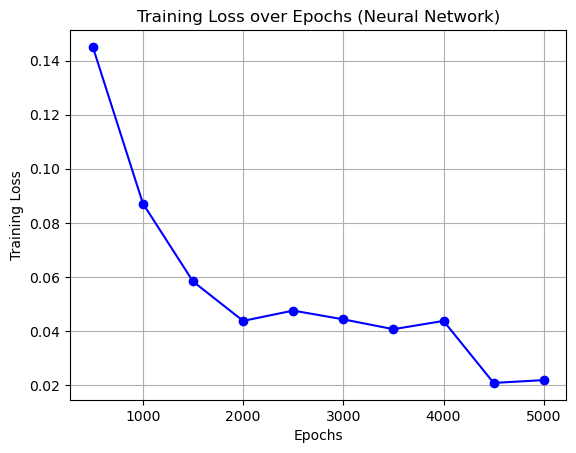

In [19]:
plt.plot(range(500, epochs + 1, 500), training_losses_nn, marker='o', linestyle='-', color='b')
plt.grid()
plt.title('Training Loss over Epochs (Neural Network)')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

# Comparison to a simple logistic regression 

## Define the logistic regression model parameters

In [20]:
weights = tf.Variable(tf.zeros([input_size, 1]), name='weights')
bias = tf.Variable(tf.zeros([1]), name='bias')

In [21]:
# Define the logistic regression model
input_size = X_train.shape[1]

# Placeholder for input data
X = tf.placeholder(tf.float32, shape=[None, input_size], name='X')

# Placeholder for binary labels (0 or 1)
y = tf.placeholder(tf.float32, shape=[None, 1], name='y')

In [22]:
# Logistic regression model
logits = tf.add(tf.matmul(X, weights), bias)
predictions = tf.nn.sigmoid(logits)

# Define loss function (binary cross-entropy)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits))

# Define optimizer (e.g., gradient descent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(loss)

In [23]:
# Initialize variables
init = tf.global_variables_initializer()

In [24]:
# Train the logistic regression model
epochs = 5000
batch_size = 32

# List to store training history
training_losses_log_r = []

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size].values.reshape(-1, 1)  # Convert to NumPy array and reshape

            sess.run(train_op, feed_dict={X: X_batch, y: y_batch})

        # Print training progress
        if (epoch + 1) % 500 == 0:
            training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train.values.reshape(-1, 1)})
            print(f'Epoch {epoch+1}/{epochs}, Training Loss: {training_loss}')

            # Save training loss for plotting
            training_losses_log_r.append(training_loss)

Epoch 500/5000, Training Loss: 30.284317016601562
Epoch 1000/5000, Training Loss: 11.173237800598145
Epoch 1500/5000, Training Loss: 8.017516136169434
Epoch 2000/5000, Training Loss: 10.407505989074707
Epoch 2500/5000, Training Loss: 7.838350296020508
Epoch 3000/5000, Training Loss: 25.219282150268555
Epoch 3500/5000, Training Loss: 23.743389129638672
Epoch 4000/5000, Training Loss: 11.036818504333496
Epoch 4500/5000, Training Loss: 26.197052001953125
Epoch 5000/5000, Training Loss: 6.833233833312988


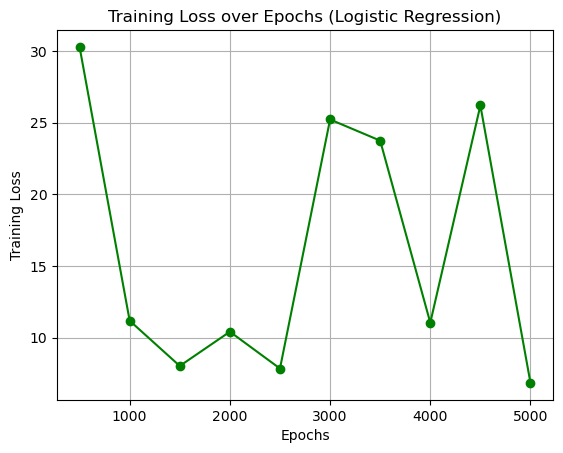

In [25]:
plt.plot(range(500, epochs + 1, 500), training_losses_log_r, marker='o', linestyle='-', color='g')
plt.grid()
plt.title('Training Loss over Epochs (Logistic Regression)')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

## Comparison in a plot

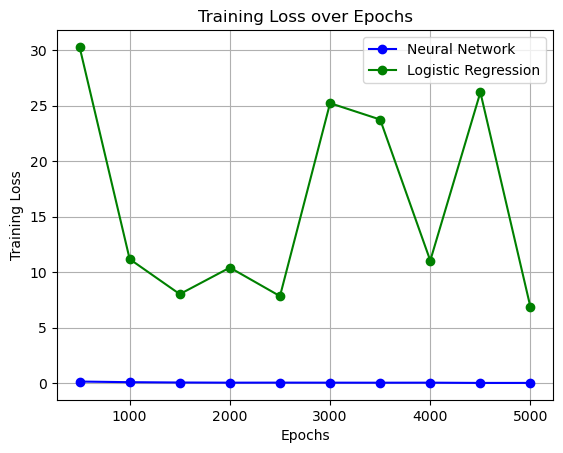

In [26]:
plt.plot(range(500, epochs + 1, 500), training_losses_nn, marker='o', linestyle='-', color='b', label='Neural Network')
plt.plot(range(500, epochs + 1, 500), training_losses_log_r, marker='o', linestyle='-', color='g', label='Logistic Regression')

# Adding labels and title
plt.grid()
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

plt.legend()  # Adding legend

plt.show()